<a href="https://colab.research.google.com/github/Okarin123/kaggleHousingPricePrediction/blob/master/source.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install seaborn #for pairplot

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# the dataset


In [3]:
from google.colab import drive 
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [4]:
cd '/gdrive/My Drive/sangam/DataSets'

/gdrive/My Drive/sangam/DataSets


In [0]:
trainData = pd.read_csv('Train.csv')
testData = pd.read_csv('Test.csv')

test_dates = testData['date_time']

In [6]:
trainData.isna().sum()

date_time              0
is_holiday             0
air_pollution_index    0
humidity               0
wind_speed             0
wind_direction         0
visibility_in_miles    0
dew_point              0
temperature            0
rain_p_h               0
snow_p_h               0
clouds_all             0
weather_type           0
weather_description    0
traffic_volume         0
dtype: int64

In [7]:
testData.isna().sum() 

date_time              0
is_holiday             0
air_pollution_index    0
humidity               0
wind_speed             0
wind_direction         0
visibility_in_miles    0
dew_point              0
temperature            0
rain_p_h               0
snow_p_h               0
clouds_all             0
weather_type           0
weather_description    0
dtype: int64

no NA values!

In [8]:
trainData.tail() 

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
33745,2017-05-17 21:00:00,None,74,85,1,328,7,7,287.88,0.0,0.0,90,Mist,mist,2348
33746,2017-05-17 22:00:00,None,81,70,1,24,2,2,286.95,0.0,0.0,90,Rain,heavy intensity rain,2194
33747,2017-05-17 22:00:00,None,138,70,1,24,1,1,286.95,0.0,0.0,90,Mist,mist,2194
33748,2017-05-17 23:00:00,None,229,66,1,42,6,6,285.75,0.0,0.0,90,Rain,heavy intensity rain,1328
33749,2017-05-17 23:00:00,None,140,63,1,27,8,8,285.75,0.0,0.0,90,Mist,mist,1328


is_holiday, date_time, weather_type and weather_description are **not numerical**

# cleaning

Let's go through the is_holiday column

In [0]:
train_holiday = trainData['is_holiday'].tolist() 
idx = [] 
for i in range (len(train_holiday)): 
  if train_holiday[i]!='None': 
    idx.append(i)

In [10]:
print(len(idx))

43


In [0]:
test_holiday = testData['is_holiday'].tolist()
idx1 = [] 
for i in range (len(test_holiday)): 
  if test_holiday[i]!='None': 
    idx1.append(i)

In [12]:
print(len(idx1))

18


(array([3.3711e+04, 4.0000e+00, 5.0000e+00, 5.0000e+00, 5.0000e+00,
        4.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00, 7.0000e+00]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

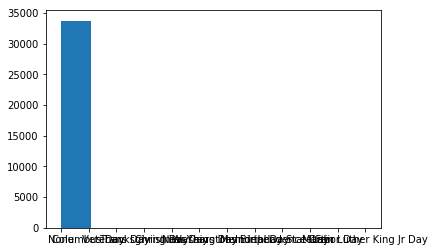

In [13]:
import numpy as np
plt.hist(np.array(train_holiday)) 

Since this coloumn only contains 'None', it is better to drop it.

(array([1.4438e+04, 2.0000e+00, 2.0000e+00, 3.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 4.0000e+00]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

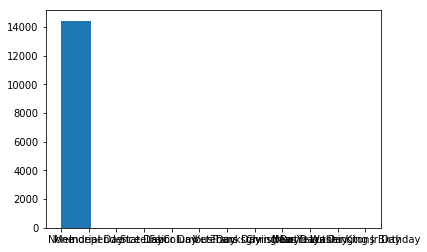

In [14]:
plt.hist(np.array(test_holiday))

In [0]:
_,_ = trainData.pop('is_holiday'),testData.pop('is_holiday')

In [16]:
trainData.tail() 

,date_time,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
33745,2017-05-17 21:00:00,74,85,1,328,7,7,287.88,0.0,0.0,90,Mist,mist,2348
33746,2017-05-17 22:00:00,81,70,1,24,2,2,286.95,0.0,0.0,90,Rain,heavy intensity rain,2194
33747,2017-05-17 22:00:00,138,70,1,24,1,1,286.95,0.0,0.0,90,Mist,mist,2194
33748,2017-05-17 23:00:00,229,66,1,42,6,6,285.75,0.0,0.0,90,Rain,heavy intensity rain,1328
33749,2017-05-17 23:00:00,140,63,1,27,8,8,285.75,0.0,0.0,90,Mist,mist,1328


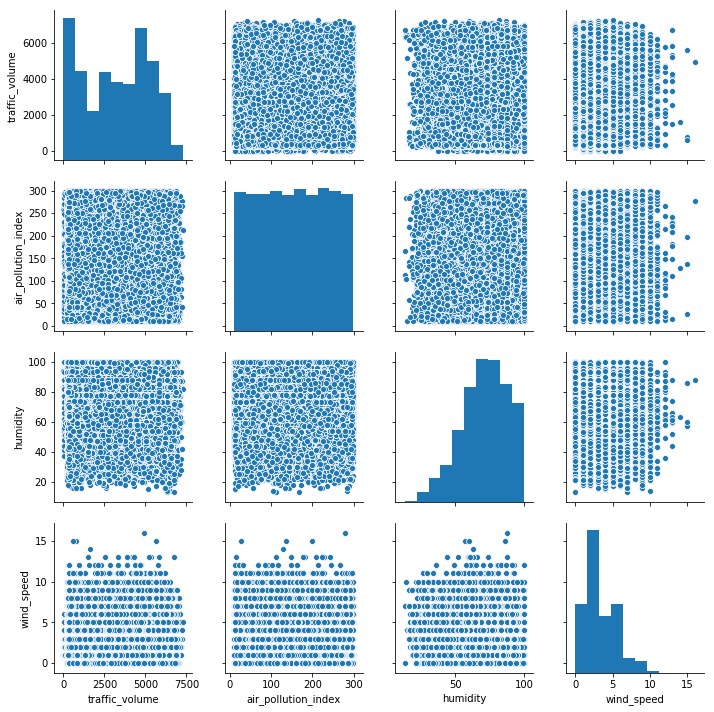

In [17]:
sns.pairplot(trainData[["traffic_volume","air_pollution_index","humidity","wind_speed"]]) 

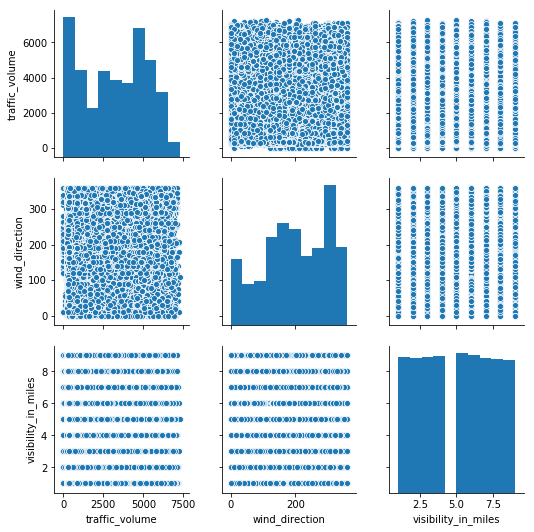

In [18]:
sns.pairplot(trainData[["traffic_volume","wind_direction","visibility_in_miles"]])

wind direction and visibility are simply not useful

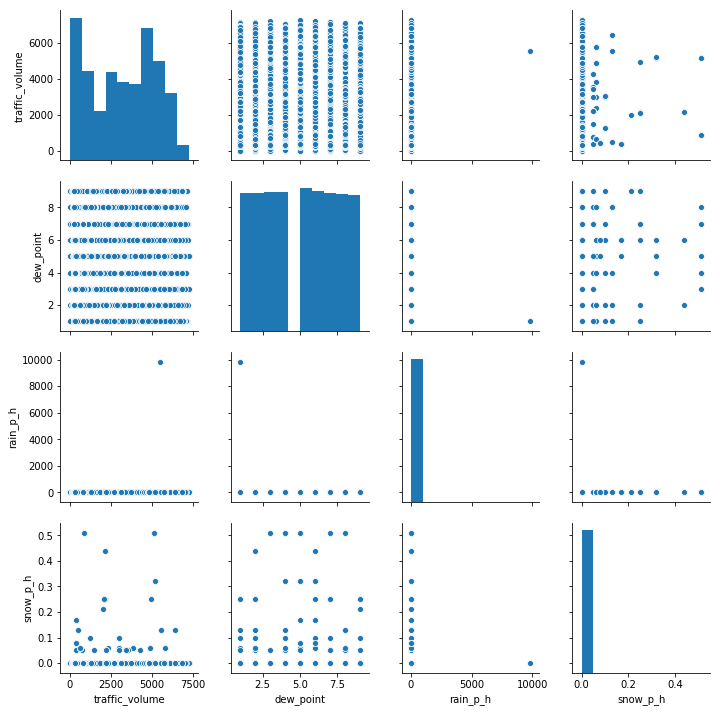

In [19]:
sns.pairplot(trainData[["traffic_volume","dew_point","rain_p_h","snow_p_h"]])

From the plots, it's obvious that dew_point is noise.

In [20]:
rainTrain = trainData['rain_p_h'].tolist() 
rain_p_h = set(rainTrain) 
rain_p_h

{0.0,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35,
 0.36,
 0.37,
 0.38,
 0.4,
 0.41,
 0.42,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47,
 0.48,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.57,
 0.58,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.65,
 0.66,
 0.67,
 0.68,
 0.69,
 0.7,
 0.71,
 0.72,
 0.73,
 0.74,
 0.76,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.83,
 0.84,
 0.85,
 0.86,
 0.87,
 0.88,
 0.89,
 0.9,
 0.91,
 0.92,
 0.93,
 0.94,
 0.95,
 0.96,
 0.97,
 0.98,
 1.0,
 1.02,
 1.03,
 1.04,
 1.05,
 1.06,
 1.07,
 1.08,
 1.09,
 1.1,
 1.11,
 1.12,
 1.13,
 1.14,
 1.15,
 1.16,
 1.19,
 1.2,
 1.21,
 1.22,
 1.24,
 1.25,
 1.27,
 1.28,
 1.29,
 1.3,
 1.31,
 1.32,
 1.33,
 1.34,
 1.35,
 1.37,
 1.38,
 1.39,
 1.4,
 1.41,
 1.44,
 1.46,
 1.47,
 1.49,
 1.5,
 1.51,
 1.52,
 1.53,
 1.55,
 1.56,
 1.59,
 1.6,
 1.61,
 1.63,
 1.65,
 1.66,
 1.67,
 1.68,
 1.69,
 1.7,
 1.71,
 1.72,
 1.76,
 1.78,
 1.8,
 1.83,
 1.84,
 1.85,
 1.86,
 1.87,
 1.88,
 1.9,
 1.91,
 1.93,
 1.95,
 1.96,
 1.98,
 2.03,
 2.

From the above cell, it's obvious that rain_p_h being 9831.3 is some mistake.



In [0]:
idx = [] 
for i in range (len(rainTrain)): 
  if rainTrain[i]>100: 
    idx.append(i)

In [22]:
len(idx)
idx

[24872]

In [23]:
row = trainData.iloc[24872]
row

date_time              2016-07-11 17:00:00
air_pollution_index                    163
humidity                                33
wind_speed                               4
wind_direction                         240
visibility_in_miles                      1
dew_point                                1
temperature                         302.11
rain_p_h                            9831.3
snow_p_h                                 0
clouds_all                              75
weather_type                          Rain
weather_description        very heavy rain
traffic_volume                        5535
Name: 24872, dtype: object

In [0]:
trainData = pd.DataFrame(trainData)
trainData = trainData.drop(trainData.index[24872]) 

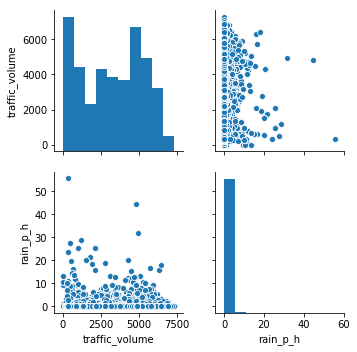

In [25]:
sns.pairplot(trainData[["traffic_volume","rain_p_h"]])

In [0]:
def toCelcius(x): 
  return x-(273.15)

trainData['temperature'] = trainData['temperature'].apply(toCelcius)
testData['temperature'] = testData['temperature'].apply(toCelcius)

In [27]:
trainData.head() 

,date_time,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,121,89,2,329,1,1,15.13,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,178,67,3,330,1,1,16.21,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,113,66,3,329,2,2,16.43,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,20,66,3,329,5,5,16.98,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,281,65,3,329,7,7,17.99,0.0,0.0,75,Clouds,broken clouds,4918


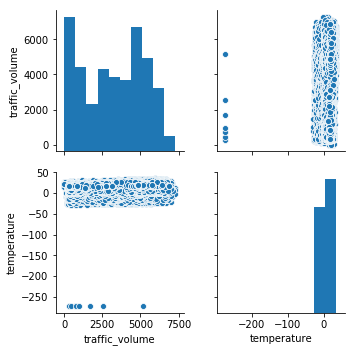

In [28]:
sns.pairplot (trainData[["traffic_volume","temperature"]])

In [0]:
toRemove = ["air_pollution_index","humidity","wind_speed","wind_direction","visibility_in_miles","dew_point","snow_p_h"]
for label in toRemove: 
  _,_ = trainData.pop(label),testData.pop(label)   

In [30]:
trainData.head() 

,date_time,temperature,rain_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,15.13,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,16.21,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,16.43,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,16.98,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,17.99,0.0,75,Clouds,broken clouds,4918


In [0]:
train_weather_description = trainData.pop('weather_description') 
test_weather_description = testData.pop('weather_description')
train_weather_type = trainData.pop('weather_type')
test_weather_type = testData.pop('weather_type')

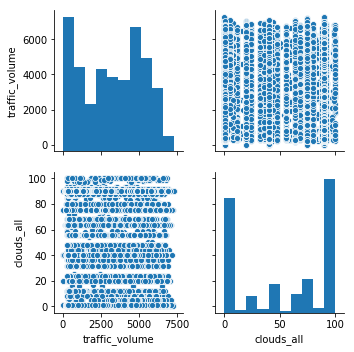

In [32]:
sns.pairplot(trainData[["traffic_volume","clouds_all"]])

In [0]:
_,_ = trainData.pop('clouds_all'),testData.pop('clouds_all')

In [0]:
import datetime 

def dayTime(X): 
  days = [] 
  times = [] 

  date_time = X.pop("date_time").tolist() 
  for x in date_time: 
    date,time = x.split() 
    days.append(datetime.datetime.strptime(date,"%Y-%m-%d").strftime('%A'))
    times.append(int(time.split(':')[0])) 

  X['day'] = days
  X['time'] = times

In [0]:
dayTime(trainData)
dayTime(testData)

In [36]:
trainData.head() 

,temperature,rain_p_h,traffic_volume,day,time
0,15.13,0.0,5545,Tuesday,9
1,16.21,0.0,4516,Tuesday,10
2,16.43,0.0,4767,Tuesday,11
3,16.98,0.0,5026,Tuesday,12
4,17.99,0.0,4918,Tuesday,13


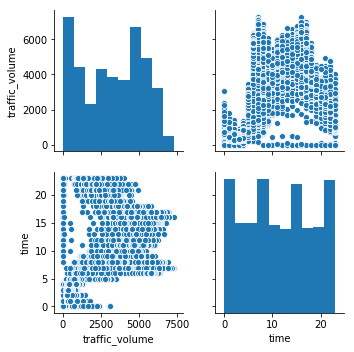

In [37]:
sns.pairplot (trainData[['traffic_volume','time']])

In [0]:
days = set(trainData['day'])
trainDays = trainData.pop('day')
testDays = testData.pop('day') 

In [0]:
for day in days: 
  trainData[day] = (trainDays == day)*1.0
  testData[day] = (testDays == day)*1.0

In [40]:
trainData.head() 

,temperature,rain_p_h,traffic_volume,time,Sunday,Monday,Thursday,Tuesday,Wednesday,Saturday,Friday
0,15.13,0.0,5545,9,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,16.21,0.0,4516,10,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,16.43,0.0,4767,11,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,16.98,0.0,5026,12,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,17.99,0.0,4918,13,0.0,0.0,0.0,1.0,0.0,0.0,0.0


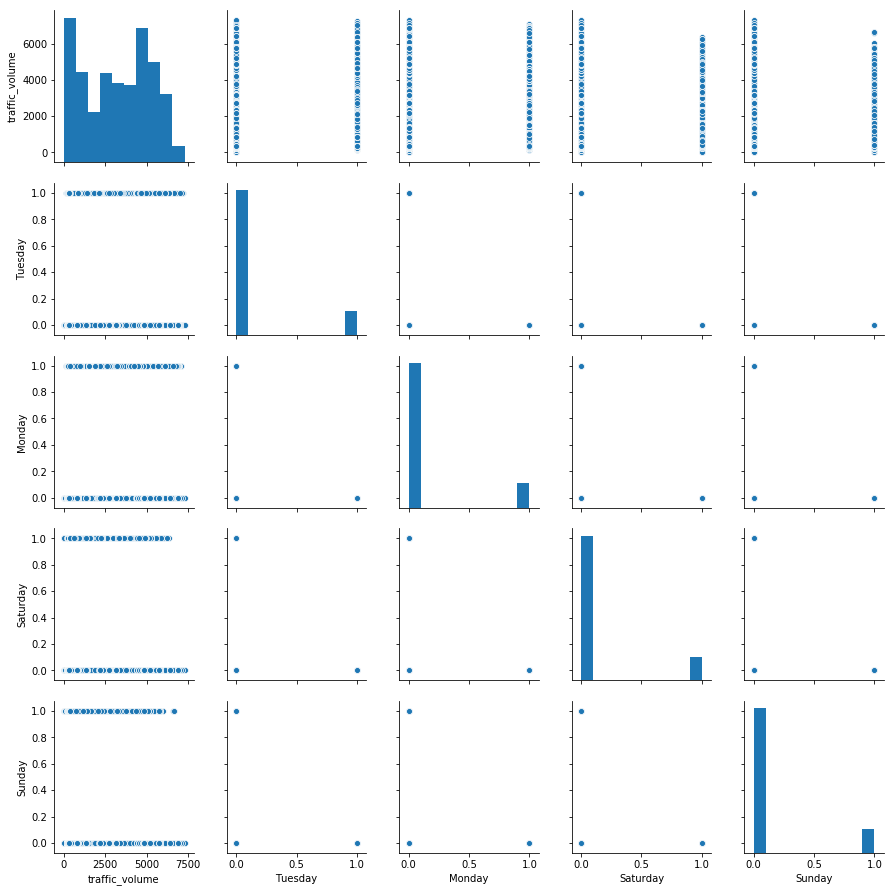

In [41]:
sns.pairplot(trainData[["traffic_volume","Tuesday","Monday","Saturday","Sunday"]])

In [0]:
train_dataset = trainData
test_dataset = testData
train_labels = train_dataset.pop("traffic_volume")

# normalization

In [69]:
train_stats = train_dataset.describe().transpose() 
train_stats

,count,mean,std,min,25%,50%,75%,max
temperature,33749.0,6.918934,13.414918,-273.15,-1.43,7.0,17.47,35.09
rain_p_h,33749.0,0.157446,1.158517,0.00,0.00,0.0,0.00,55.63
time,33749.0,11.404219,6.951115,0.00,5.00,11.0,17.00,23.00
Sunday,33749.0,0.143441,0.350527,0.00,0.00,0.0,0.00,1.00
Monday,33749.0,0.146938,0.354049,0.00,0.00,0.0,0.00,1.00
Thursday,33749.0,0.141723,0.348771,0.00,0.00,0.0,0.00,1.00
Tuesday,33749.0,0.140775,0.347794,0.00,0.00,0.0,0.00,1.00
Wednesday,33749.0,0.146049,0.353160,0.00,0.00,0.0,0.00,1.00
Saturday,33749.0,0.139767,0.346750,0.00,0.00,0.0,0.00,1.00
Friday,33749.0,0.141308,0.348344,0.00,0.00,0.0,0.00,1.00


In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [71]:
train_stats = normed_train_data.describe().transpose() 
train_stats

,count,mean,std,min,25%,50%,75%,max
temperature,33749.0,-3.946524e-16,1.0,-20.877424,-0.622362,0.006043,0.786517,2.099980
rain_p_h,33749.0,-1.086773e-14,1.0,-0.135903,-0.135903,-0.135903,-0.135903,47.882370
time,33749.0,5.710827e-18,1.0,-1.640632,-0.921323,-0.058152,0.805019,1.668190
Sunday,33749.0,-1.016603e-15,1.0,-0.409216,-0.409216,-0.409216,-0.409216,2.443628
Monday,33749.0,-5.435484e-17,1.0,-0.415021,-0.415021,-0.415021,-0.415021,2.409447
Thursday,33749.0,1.130714e-15,1.0,-0.406349,-0.406349,-0.406349,-0.406349,2.460864
Tuesday,33749.0,5.007129e-15,1.0,-0.404764,-0.404764,-0.404764,-0.404764,2.470501
Wednesday,33749.0,4.435708e-15,1.0,-0.413548,-0.413548,-0.413548,-0.413548,2.418027
Saturday,33749.0,2.222548e-15,1.0,-0.403077,-0.403077,-0.403077,-0.403077,2.480842
Friday,33749.0,1.760948e-17,1.0,-0.405656,-0.405656,-0.405656,-0.405656,2.465069


# pca

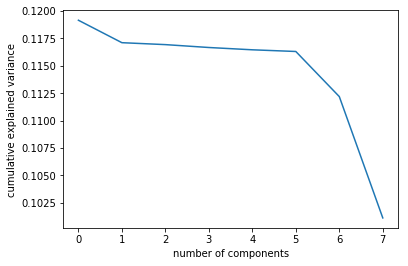

In [117]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)

pca.fit(normed_train_data)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance') 
columns = ['pca_%i' % i for i in range(pca.n_components_)]

training_pca = pd.DataFrame(pca.transform(normed_train_data),columns=columns)
test_pca= pd.DataFrame(pca.transform(normed_test_data),columns=columns)

In [90]:
training_pca.head() 

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8
0,0.173833,0.519413,0.098500,-0.587760,2.281685,-1.142406,-0.145403,0.048497,-0.655096
1,0.231959,0.501828,0.111888,-0.594676,2.278189,-1.144215,-0.268781,-0.038247,-0.632720
2,0.267037,0.488311,0.120326,-0.599871,2.274151,-1.146098,-0.352130,-0.128266,-0.566513
3,0.310960,0.473233,0.130663,-0.605726,2.270320,-1.147953,-0.450839,-0.217029,-0.517125
4,0.367210,0.455979,0.143648,-0.612502,2.266781,-1.149767,-0.570958,-0.304040,-0.491182


# model

Here, we'll use a `Sequential` model with two densely connected hidden layers, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, `build_model`

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(training_pca.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.Adam(0.1)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [92]:
model = build_model()
model.summary() 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [107]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 10 == 0: print(epoch) 
    print('.', end='')

EPOCHS = 10

history = model.fit(
  training_pca, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

0
..........

In [108]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail() 

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
5,298954.291685,336.349457,298954.37500,305359.404419,383.683014,305359.40625,5
6,302463.610580,339.047119,302463.71875,266371.900069,338.788818,266371.87500,6
7,304923.449869,340.441895,304923.40625,270732.034743,344.795654,270731.87500,7
8,301195.488790,337.738281,301195.53125,264072.261704,323.495117,264072.21875,8
9,304614.806760,341.444946,304614.78125,257528.853137,340.800507,257528.87500,9


# predictions

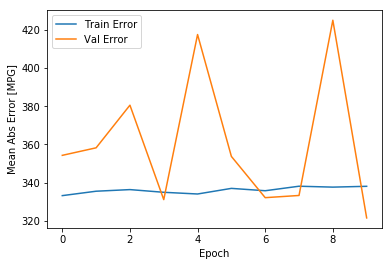

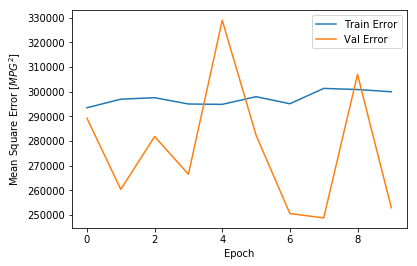

In [101]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  #plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  #plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

In [0]:
test_predictions = model.predict(test_pca)

In [103]:
test_pred = test_predictions.tolist()
test_dates = test_dates.tolist()

AttributeError: ignored

In [0]:
finalList = [["date_time","traffic_volume"]] 
for i in range (len(test_pred)): 
  finalList.append([test_dates[i],test_pred[i][0]])   

In [105]:
finalList[0:5]

[['date_time', 'traffic_volume'],
 ['2017-05-18 00:00:00', 596.4376220703125],
 ['2017-05-18 00:00:00', 596.4376220703125],
 ['2017-05-18 00:00:00', 596.4376220703125],
 ['2017-05-18 01:00:00', 362.6437072753906]]

In [0]:
my_df = pd.DataFrame(finalList)
my_df.to_csv('submission3.csv', index=False, header=False)

In [82]:
ls

 asp.csv                 submission1.csv  'weather description labels.txt'
 keras.ipynb             submission.csv   'weather type labels.txt'
 out.csv                 Test.csv
 sample_submission.csv   Train.csv


In [0]:
df = pd.read_csv('submission.csv')

In [67]:
df

,date_time,traffic_volume
0,2017-05-18 00:00:00,503.170563
1,2017-05-18 00:00:00,503.170563
2,2017-05-18 00:00:00,503.170563
3,2017-05-18 01:00:00,503.170563
4,2017-05-18 01:00:00,503.170563
5,2017-05-18 02:00:00,503.170563
6,2017-05-18 02:00:00,503.170563
7,2017-05-18 02:00:00,503.170563
8,2017-05-18 03:00:00,503.170563
9,2017-05-18 03:00:00,503.170563
